# Module 2 - Data Processing for AI
**Assignments merged:** Pandas & SQL Exercises
**Student:** Salma Areef Syed

## Objective

- Demonstrate Pandas data processing and SQL-style operations.



## Part A — Pandas & SQL Exercises

In [2]:
#!pip install pandas==2.0.3
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26801 sha256=2bedcf630477aad5d02ef41a26403b12eda05a9be521a7bd4fbd0f03b95894d1
  Stored in directory: c:\users\salma\appdata\local\pip\cache\wheels\15\a1\e7\6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [5]:
#p install pandas==2.0.3
!pip install pandas --upgrade

In [6]:
import numpy as np
import pandas as pd
import pandasql as ps
import seaborn as sns
from pandasql import sqldf

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
df = sns.load_dataset('titanic')
df.head()
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
pysqldf = lambda q: sqldf(q, globals())

In [10]:

q = '''
SELECT * from df
'''
output = pysqldf(q)
output

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,None,Southampton,no,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,None,Southampton,no,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1


In [11]:
# Run 10 different queries for the selected datafram to answer key questions of the data
# 1. Find total number of passengers
q = '''
SELECT COUNT(*) AS total_passengers FROM df
'''
output = pysqldf(q)
output

,total_passengers
0,891


In [12]:
# 2. how many passengers survieved in which deck?

q = '''
SELECT
  distinct(deck)
FROM df

'''
output = pysqldf(q)
output

,deck
0,None
1,C
2,E
3,G
4,D
5,A
6,B
7,F


In [13]:
# 2. how many passengers survived in which deck?

q = '''
SELECT
  deck,
  COUNT(*) AS total_passengers,
  SUM(survived) AS survived_passengers,
  ROUND(SUM(survived)*100.0 / COUNT(*), 2) AS survival_rate_percent
FROM df
WHERE deck IS NOT NULL
GROUP BY deck
ORDER BY deck;
'''
output = pysqldf(q)
output

,deck,total_passengers,survived_passengers,survival_rate_percent
0,A,15,7,46.67
1,B,47,35,74.47
2,C,59,35,59.32
3,D,33,25,75.76
4,E,32,24,75.00
5,F,13,8,61.54
6,G,4,2,50.00


In [14]:
#3. Identify Passengers Traveling Alone vs With Family and Compare Survival
q = '''
SELECT
  CASE
    WHEN (sibsp + parch) = 0 THEN 'Alone'
    ELSE 'With Family'
  END AS travel_group,
  COUNT(*) AS total,
  SUM(survived) AS survivors,
  ROUND(AVG(survived) * 100, 2) AS survival_rate
FROM df
GROUP BY travel_group;
'''
output = pysqldf(q)
output

,travel_group,total,survivors,survival_rate
0,Alone,537,163,30.35
1,With Family,354,179,50.56


In [15]:
#4. Average age of survivors vs non-survivors, grouped by gender
q = '''
SELECT
  sex,
  survived,
  ROUND(AVG(age), 2) AS avg_age
FROM df
WHERE age IS NOT NULL
GROUP BY sex, survived;
'''
output = pysqldf(q)
output

,sex,survived,avg_age
0,female,0,25.05
1,female,1,28.85
2,male,0,31.62
3,male,1,27.28


In [16]:
#5. Passengers with fare above the 95th percentile

fare_95 = df['fare'].quantile(0.95)
q = '''
SELECT *
FROM df
WHERE fare > {}
ORDER BY fare DESC;
'''.format(fare_95)
output = pysqldf(q)
output

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,35.00,0,0,512.3292,C,First,woman,0,None,Cherbourg,yes,1
1,1,1,male,36.00,0,1,512.3292,C,First,man,1,B,Cherbourg,yes,0
2,1,1,male,35.00,0,0,512.3292,C,First,man,1,B,Cherbourg,yes,1
3,0,1,male,19.00,3,2,263.0000,S,First,man,1,C,Southampton,no,0
4,1,1,female,23.00,3,2,263.0000,S,First,woman,0,C,Southampton,yes,0
5,1,1,female,24.00,3,2,263.0000,S,First,woman,0,C,Southampton,yes,0
6,0,1,male,64.00,1,4,263.0000,S,First,man,1,C,Southampton,no,0
7,1,1,female,18.00,2,2,262.3750,C,First,woman,0,B,Cherbourg,yes,0
8,1,1,female,21.00,2,2,262.3750,C,First,woman,0,B,Cherbourg,yes,0
9,0,1,male,24.00,0,1,247.5208,C,First,man,1,B,Cherbourg,no,0


In [17]:
#6. How many passengers between age 0 , 1
q = '''
SELECT COUNT(*) AS infant_passenger_count
FROM df
WHERE age >= 0 AND age <= 1;
'''
output = pysqldf(q)
output

,infant_passenger_count
0,14


In [18]:
#7. Find Passengers Paying Above the Average Fare in Their Class

q = '''
SELECT *
FROM df t1
WHERE fare > (
  SELECT AVG(fare)
  FROM df t2
  WHERE t2.pclass = t1.pclass
)
ORDER BY fare DESC;
'''
output = pysqldf(q)
output

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,35.0,0,0,512.3292,C,First,woman,0,None,Cherbourg,yes,1
1,1,1,male,36.0,0,1,512.3292,C,First,man,1,B,Cherbourg,yes,0
2,1,1,male,35.0,0,0,512.3292,C,First,man,1,B,Cherbourg,yes,1
3,0,1,male,19.0,3,2,263.0000,S,First,man,1,C,Southampton,no,0
4,1,1,female,23.0,3,2,263.0000,S,First,woman,0,C,Southampton,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,3,female,18.0,0,1,14.4542,C,Third,woman,0,None,Cherbourg,no,0
294,1,3,female,15.0,1,0,14.4542,C,Third,child,0,None,Cherbourg,yes,0
295,0,3,female,28.0,1,1,14.4000,S,Third,woman,0,None,Southampton,no,0
296,0,3,male,34.0,1,1,14.4000,S,Third,man,1,None,Southampton,no,0


In [19]:
#8. Average Age of Survivors vs Non-Survivors who embarked in Southampton town

q = '''
SELECT
  survived,
  ROUND(AVG(age), 2) AS avg_age,
  COUNT(*) AS count_passengers
FROM df
WHERE embarked = 'S' AND age IS NOT NULL
GROUP BY survived;
'''
output = pysqldf(q)
output



,survived,avg_age,count_passengers
0,0,30.20,353
1,1,28.11,201


In [20]:
#9. Survival count by gender

q = '''
SELECT sex, survived, COUNT(*) AS count
FROM df
GROUP BY sex, survived;
'''
output = pysqldf(q)
output

,sex,survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [21]:
#10.  Survival rate by passenger class
df.columns

q = '''
SELECT class, AVG(survived)*100 AS survival_rate
FROM df
GROUP BY class
'''
output = pysqldf(q)
output

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

,class,survival_rate
0,First,62.962963
1,Second,47.282609
2,Third,24.236253


## Part B — SQL Assignments

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()
#Print multiple statemetns in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
titanic.info()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
titanic.drop(columns = ['who', 'adult_male', 'embark_town', 'alone', 'alive', 'class', 'deck'], inplace = True)
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
titanic['embarked'].mode()

,embarked
0,S


In [24]:
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [25]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
27,0,1,male,19.0,3,2,263.0000,S
176,0,3,male,28.0,3,1,25.4667,S
635,1,2,female,28.0,0,0,13.0000,S
882,0,3,female,22.0,0,0,10.5167,S
89,0,3,male,24.0,0,0,8.0500,S
196,0,3,male,28.0,0,0,7.7500,Q
26,0,3,male,28.0,0,0,7.2250,C
6,0,1,male,54.0,0,0,51.8625,S
141,1,3,female,22.0,0,0,7.7500,S
52,1,1,female,49.0,1,0,76.7292,C


In [26]:
for x in titanic.columns:
  if titanic[x].dtype == "object":
    titanic[x]=pd.Categorical(titanic[x]).codes


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int8   
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [28]:
np.arange(0,1.01,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [30]:
titanic.quantile(np.arange(0,1.01,0.05))

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0.00,0.0,1.0,0.0,0.42,0.0,0.0,0.00000,0.0
0.05,0.0,1.0,0.0,6.00,0.0,0.0,7.22500,0.0
0.10,0.0,1.0,0.0,16.00,0.0,0.0,7.55000,0.0
0.15,0.0,1.0,0.0,18.00,0.0,0.0,7.75000,0.0
0.20,0.0,1.0,0.0,20.00,0.0,0.0,7.85420,1.0
0.25,0.0,2.0,0.0,22.00,0.0,0.0,7.91040,1.0
0.30,0.0,2.0,0.0,24.00,0.0,0.0,8.05000,2.0
0.35,0.0,2.0,0.0,26.00,0.0,0.0,9.00000,2.0
0.40,0.0,2.0,1.0,28.00,0.0,0.0,10.50000,2.0
0.45,0.0,3.0,1.0,28.00,0.0,0.0,13.00000,2.0


It calculates quantiles (percentiles) for numerical columns in the titanic DataFrame at every 5% interval, from 0% to 100%.

<Axes: >

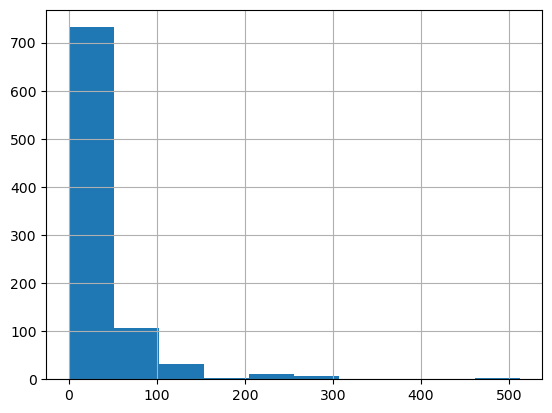

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
titanic.fare.hist()
plt.show()


In [32]:
print(np.round(titanic.fare.median()),2)
print(np.round(titanic.fare.mean(),2))

14.0 2
32.2


In [33]:
titanic.boxplot(column=['fare'])

<Axes: >

In [24]:
titanic.fare.quantile([0,0.01,0.02,0.05,0.90,0.95,0.99,1.00])

,fare
0.00,0.00000
0.01,0.00000
0.02,6.39750
0.05,7.22500
0.90,77.95830
0.95,112.07915
0.99,249.00622
1.00,512.32920


In [34]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [35]:
titanic.fare = np.clip(titanic.fare, titanic.fare.quantile(0.02), titanic.fare.quantile(0.99))
titanic.fare.describe()
titanic.info()

count    891.000000
mean      31.336894
std       42.450163
min        6.397500
25%        7.910400
50%       14.454200
75%       31.000000
max      249.006220
Name: fare, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int8   
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [36]:
for x in titanic.columns:
  outlier = titanic[x].quantile([0.01,0.99]).values
  titanic[x] = np.clip(titanic[x],outlier[0],outlier[1])
  titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,31.336894,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,42.450163,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,31.336894,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,42.450163,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,31.336894,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,42.450163,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304714,0.523008,0.381594,31.336894,1.536476
std,0.486592,0.836071,0.477990,12.832434,1.102743,0.806057,42.450163,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,8.000000,6.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304714,0.499439,0.381594,31.336894,1.536476
std,0.486592,0.836071,0.477990,12.832434,0.966140,0.806057,42.450163,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,5.000000,6.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304714,0.499439,0.373737,31.336894,1.536476
std,0.486592,0.836071,0.477990,12.832434,0.966140,0.763306,42.450163,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,249.006220,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304714,0.499439,0.373737,31.323390,1.536476
std,0.486592,0.836071,0.477990,12.832434,0.966140,0.763306,42.380997,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,247.669342,2.000000


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304714,0.499439,0.373737,31.323390,1.536476
std,0.486592,0.836071,0.477990,12.832434,0.966140,0.763306,42.380997,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.397500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,247.669342,2.000000


In [37]:
titanic.shape

(891, 8)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [39]:
x = titanic.drop(['survived'], axis=1, inplace=False)
y = titanic['survived']
x.shape
print('\n')
y.shape

(891, 7)

(891,)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scld_titanic = MinMaxScaler(feature_range= (0,1))
titanic_transformed = scld_titanic.fit_transform(x)
scld_titanic_df = pd.DataFrame(titanic_transformed, columns=x.columns)
scld_titanic_df.head()
scld_titanic_df.describe()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0.328125,0.2,0.0,0.003533,1.0
1,0.0,0.0,0.578125,0.2,0.0,0.268932,0.0
2,1.0,0.0,0.390625,0.0,0.0,0.006331,1.0
3,0.0,0.0,0.531250,0.2,0.0,0.193568,1.0
4,1.0,1.0,0.531250,0.0,0.0,0.006849,1.0


,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.442261,0.099888,0.093434,0.103310,0.768238
std,0.418036,0.477990,0.200507,0.193228,0.190826,0.175657,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.328125,0.000000,0.000000,0.006271,0.500000
50%,1.000000,1.000000,0.421875,0.000000,0.000000,0.033393,1.000000
75%,1.000000,1.000000,0.531250,0.200000,0.000000,0.101970,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler
scld_titanic = StandardScaler()
titanic_transformed = scld_titanic.fit_transform(x)
scld_titanic_df = pd.DataFrame(titanic_transformed, columns=x.columns)
scld_titanic_df.head()
np.round(scld_titanic_df.describe(),2)

,pclass,sex,age,sibsp,parch,fare,embarked
0,0.827377,0.737695,-0.569558,0.518395,-0.489905,-0.568342,0.585954
1,-1.566107,-1.355574,0.677983,0.518395,-0.489905,0.943403,-1.942303
2,0.827377,-1.355574,-0.257673,-0.517233,-0.489905,-0.552406,0.585954
3,-1.566107,-1.355574,0.444069,0.518395,-0.489905,0.514118,0.585954
4,0.827377,0.737695,0.444069,-0.517233,-0.489905,-0.549455,0.585954


,pclass,sex,age,sibsp,parch,fare,embarked
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.57,-1.36,-2.21,-0.52,-0.49,-0.59,-1.94
25%,-0.37,-1.36,-0.57,-0.52,-0.49,-0.55,-0.68
50%,0.83,0.74,-0.10,-0.52,-0.49,-0.40,0.59
75%,0.83,0.74,0.44,0.52,-0.49,-0.01,0.59
max,0.83,0.74,2.78,4.66,4.75,5.11,0.59
